# Assignment 9: Bayesian Analysis

### Conditional Probability 

Q.1 Explain in few terms what is Naive Bayes. What is it considered Naive?

In [1]:
# Naive Bayes is an assumption that the presence of a particular feature in a class is 
# unrelated to the presence of any other feature.
# It is naive because it assumes that feature is unrelated and independent to other features.

In [2]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", 101)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
np.random.seed(1)

In [3]:
import pandas as pd

data = pd.read_csv('../data/shingles.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rash                     1841 non-null   object
 1   SwollenLymphNode         1841 non-null   object
 2   Chills                   1841 non-null   object
 3   PolymeraseChainReaction  1841 non-null   object
 4   VZVAntibodyTest          1841 non-null   object
 5   Blisters                 1841 non-null   object
dtypes: object(6)
memory usage: 86.4+ KB
None


,Rash,SwollenLymphNode,Chills,PolymeraseChainReaction,VZVAntibodyTest,Blisters
0,no,no,no,no,pos,no
1,yes,no,no,no,neg,no
2,no,no,no,no,neg,no
3,no,no,no,no,neg,no
4,no,no,no,no,neg,no


Q.2. Does this data contain any missing values?

In [4]:
data.isnull().sum()

Rash                       0
SwollenLymphNode           0
Chills                     0
PolymeraseChainReaction    0
VZVAntibodyTest            0
Blisters                   0
dtype: int64

Preprocess Data

In [5]:
data.Rash.unique()
data.loc[data['Rash']=='no','Rash'] = 0
data.loc[data['Rash']!=0,'Rash'] = 1
#data.VZVAntibodyTest.value_counts()

array(['no', 'yes'], dtype=object)

In [6]:
data.SwollenLymphNode.unique()
data.loc[data['SwollenLymphNode']=='no','SwollenLymphNode'] = 0
data.loc[data['SwollenLymphNode']!=0,'SwollenLymphNode'] = 1
#data.VZVAntibodyTest.value_counts()

array(['no', 'yes'], dtype=object)

In [7]:
data.Chills.unique()
data.loc[data['Chills']=='no','Chills'] = 0
data.loc[data['Chills']!=0,'Chills'] = 1
#data.VZVAntibodyTest.value_counts()

array(['no', 'yes'], dtype=object)

In [8]:
data.PolymeraseChainReaction.unique()
data.loc[data['PolymeraseChainReaction']=='no','PolymeraseChainReaction'] = 0
data.loc[data['PolymeraseChainReaction']!=0,'PolymeraseChainReaction'] = 1
#data.VZVAntibodyTest.value_counts()

array(['no', 'yes'], dtype=object)

In [9]:
data.VZVAntibodyTest.unique()
data.loc[data['VZVAntibodyTest']=='neg','VZVAntibodyTest'] = 0
data.loc[data['VZVAntibodyTest']!=0,'VZVAntibodyTest'] = 1
#data.VZVAntibodyTest.value_counts()

array(['pos', 'neg', 'yes'], dtype=object)

In [10]:
data.Blisters.unique()
data.loc[(data['Blisters']=='neg') | (data['Blisters']=='no'),'Blisters'] = 0
data.loc[data['Blisters']!=0,'Blisters'] = 1
#data.VZVAntibodyTest.value_counts()

array(['no', 'yes', 'neg', 'pos', 'po'], dtype=object)

In [11]:
data.describe()
for col in data.columns:
    data[col] = data[col].astype(int)

,Rash,SwollenLymphNode,Chills,PolymeraseChainReaction,VZVAntibodyTest,Blisters
count,1841,1841,1841,1841,1841,1841
unique,2,2,2,2,2,2
top,0,0,0,0,0,0
freq,960,1124,925,1046,1065,1568


<Figure size 432x288 with 0 Axes>

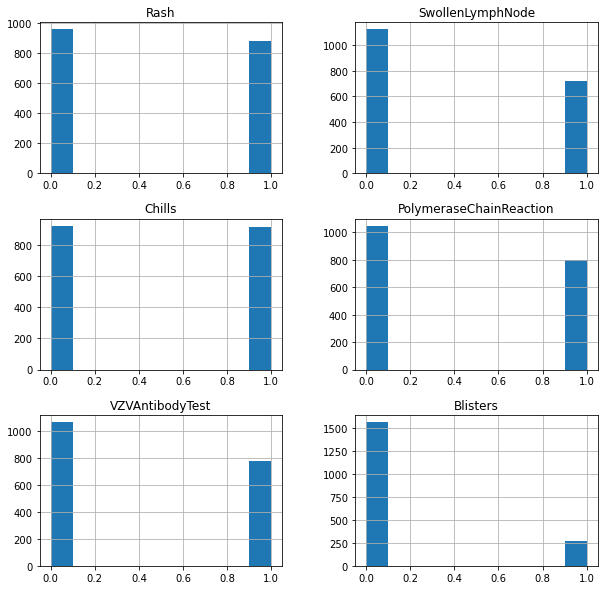

In [12]:
fig = plt.figure()
fig = data.hist(figsize=(10, 10));

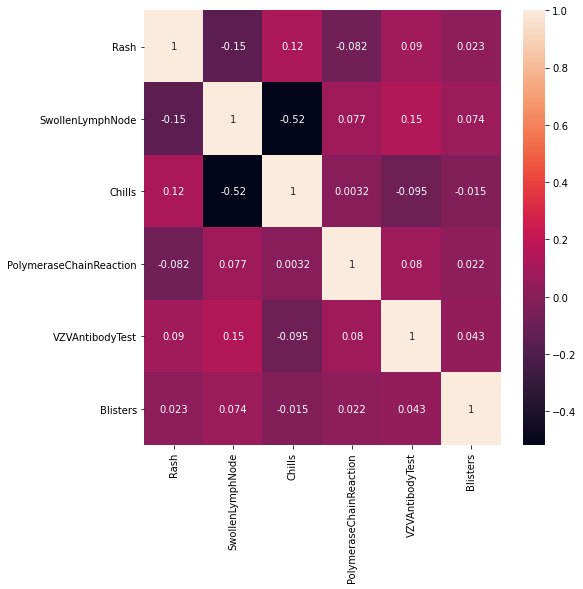

In [13]:
plt.figure(figsize=(8,8))
c= data.corr()
sns.heatmap(c,annot=True);

Q.3. Split the data into 70/30 train test

In [14]:
from sklearn.model_selection import train_test_split

target = 'Rash'
y = data[target]
X = data.drop([target],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Q.4. Train a Gaussian Naive Bayes model, a Multinomial Naive Bayes and a Bernoulli Naive Bayes on the dataset to predict Rash. Compute the accuracy for each. Explain your results. 

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score


models = [GaussianNB(),MultinomialNB(),BernoulliNB()]
scores = pd.DataFrame(
    columns=['Accuracy']
)
for i,model in enumerate(models):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    s = accuracy_score(y_test,y_pred)
    df = pd.DataFrame(
        index=[f'{model.__class__.__name__}'],
        columns=['Accuracy'],
        data = [round(s,4)]
    )
    scores = pd.concat([scores,df])

scores.sort_values('Accuracy',ascending=False)

GaussianNB(priors=None, var_smoothing=1e-09)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

,Accuracy
MultinomialNB,0.5787
GaussianNB,0.5606
BernoulliNB,0.5606


In [16]:
# MultinomialNB had the best performance. All models performed very similarly. 
# In all models, the accuracy is not much better than 50-50 chance.

Q.5. Utilizing Pipeline and GridSearchCV, use 5 different alpha values to train a Bernoulli Naive Bayes and Multinomial Naive Bayes on the dataset. Print out the accuracy for each, and explain your results.

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

class MrClean(BaseEstimator, TransformerMixin):
    def __init__(self): 
        return None
    
    def fit(self, X, y=None):
        return self  
    
    def transform(self, X, y=None):
        # Rash
        X.loc[X['Rash']=='no','Rash'] = 0
        X.loc[X['Rash']!=0,'Rash'] = 1
        # SwollenLymphNode
        X.loc[X['SwollenLymphNode']=='no','SwollenLymphNode'] = 0
        X.loc[X['SwollenLymphNode']!=0,'SwollenLymphNode'] = 1
        # Chills
        X.loc[X['Chills']=='no','Chills'] = 0
        X.loc[X['Chills']!=0,'Chills'] = 1
        # PolymeraseChainReaction
        X.loc[X['PolymeraseChainReaction']=='no','PolymeraseChainReaction'] = 0
        X.loc[X['PolymeraseChainReaction']!=0,'PolymeraseChainReaction'] = 1
        # VZVAntibodyTest
        X.loc[X['VZVAntibodyTest']=='neg','VZVAntibodyTest'] = 0
        X.loc[X['VZVAntibodyTest']!=0,'VZVAntibodyTest'] = 1
        # Blisters
        X.loc[(X['Blisters']=='neg') | (X['Blisters']=='no'),'Blisters'] = 0
        X.loc[X['Blisters']!=0,'Blisters'] = 1
        for col in X.columns:
            X[col] = X[col].astype(int)
        return X

In [18]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
# predict(X): Call predict on the estimator with the best found parameters.

data = pd.read_csv('../data/shingles.csv')
pipe = Pipeline([
    ('clean',MrClean())
])
data_tr = pipe.fit_transform(data)
data_tr.head()

target = 'Rash'
y = data_tr[target]
X = data_tr.drop([target],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scores = pd.DataFrame(
    columns=['Accuracy']
)

print('Training Performance')
models = [BernoulliNB(),MultinomialNB()]
for i,model in enumerate(models):
    kfold = KFold(n_splits=10, shuffle=True)
    parameters  = {'alpha' : [0.01,0.1,1,10,100]}
    grid_search = GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=kfold)
    grid_search.fit(X_train,y_train)
    pd.DataFrame.from_dict(grid_search.cv_results_, orient='index')
    #y_pred = grid_search.predict(X_test)
    #s = accuracy_score(y_test,y_pred)
    results = cross_val_score(grid_search.best_estimator_, X_test, y_test, cv=kfold, scoring='accuracy')
    df = pd.DataFrame(
        index=[f'{model.__class__.__name__}'],
        data = {
            'Accuracy': [results.mean()], 
            'Best Alpha': [grid_search.best_estimator_.alpha],
        }
    )
    scores = pd.concat([scores,df])


print('\nTest Performance')
scores.sort_values('Accuracy',ascending=False)

,Rash,SwollenLymphNode,Chills,PolymeraseChainReaction,VZVAntibodyTest,Blisters
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


Training Performance


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

,0,1,2,3,4
mean_fit_time,0.00137398,0.00132992,0.00133331,0.00125995,0.00123868
std_fit_time,0.000128566,5.37166e-05,0.000130204,2.41811e-05,6.46479e-06
mean_score_time,0.00065105,0.000621533,0.000618649,0.000590372,0.000573564
std_score_time,0.000100722,3.11476e-05,6.78492e-05,3.48778e-05,4.04054e-06
param_alpha,0.01,0.1,1,10,100
params,{'alpha': 0.01},{'alpha': 0.1},{'alpha': 1},{'alpha': 10},{'alpha': 100}
split0_test_score,0.496124,0.496124,0.496124,0.496124,0.496124
split1_test_score,0.542636,0.542636,0.542636,0.542636,0.589147
split2_test_score,0.550388,0.550388,0.550388,0.550388,0.550388
split3_test_score,0.542636,0.542636,0.542636,0.542636,0.604651


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

,0,1,2,3,4
mean_fit_time,0.00115552,0.00118289,0.00112693,0.00114667,0.0011323
std_fit_time,5.64439e-05,8.04791e-05,1.31074e-05,2.67085e-05,1.92443e-05
mean_score_time,0.000519061,0.000537753,0.000557995,0.000515747,0.0005126
std_score_time,2.01128e-05,3.22381e-05,0.000150123,9.44017e-06,6.31787e-06
param_alpha,0.01,0.1,1,10,100
params,{'alpha': 0.01},{'alpha': 0.1},{'alpha': 1},{'alpha': 10},{'alpha': 100}
split0_test_score,0.550388,0.550388,0.550388,0.550388,0.55814
split1_test_score,0.565891,0.565891,0.565891,0.565891,0.565891
split2_test_score,0.604651,0.604651,0.604651,0.604651,0.604651
split3_test_score,0.589147,0.589147,0.589147,0.589147,0.604651



Test Performance


,Accuracy,Best Alpha
MultinomialNB,0.548084,100.0
BernoulliNB,0.542532,100.0


In [19]:
# Comments

# Even with tuning the alpha hyper-parameter, the performance on the test data 
# is only slightly better than 50-50 chance. 

# Runnning this section multiple times shows that the best alpha parameter can change
# and does not greatly affect the performance of the model.

# The performance is expected because the data is not clearly separated - refer back to histogram plots.

## Inference in Bayesian networks

Q.6. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
                                                                      
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.


In [20]:
# Enter summary here

# I gained the most value in knowing when it is valuable to use Bayesian networks.
# I learned that tBayesian networks are great baselines in modeling high dimensionality data and 
# when class labels are strongly separated.